In [1]:
import os
import pandas as pd
from imageio import imread
import math
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
import pickle

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

# SVM với processed_img

In [2]:
data_dir = 'C:\\Users\\nhinp3\\Documents\\BML_Final project'
processed_train_path = 'Processed/trainProcessed.npy'
processed_test_path = 'Processed/testProcessed.npy'

In [3]:
def load_data(filedir, filepath, csvfile):
    data = np.load(os.path.join(filedir, filepath), allow_pickle=True)
    train_info = pd.read_csv(os.path.join(filedir, csvfile))
    labels = np.array(train_info['ClassId'])
    
    return data, labels


In [4]:
trainProcessedData, trainLabels = load_data(data_dir, processed_train_path, 'Train.csv')

(39209, 32, 32, 3)
39209


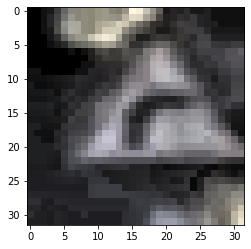

In [5]:
print(trainProcessedData.shape)
print(len(trainLabels))
plt.imshow(trainProcessedData[0])
plt.show()

In [6]:
testProcessedData, testLabels = load_data(data_dir, processed_test_path, 'Test.csv')

(12630, 32, 32, 3)
12630


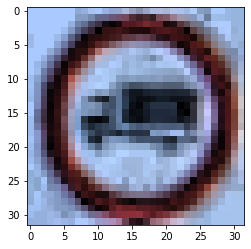

In [7]:
print(testProcessedData.shape)
print(len(testLabels))
plt.imshow(testProcessedData[0])
plt.show()

In [8]:
def randomize_data(labels, data):
    randomize = np.arange(len(labels))
    np.random.shuffle(randomize)
    X = data[randomize]
    y = labels[randomize]
    
    return X, y

In [9]:
trainProcessedData, trainLabels = randomize_data(trainLabels, trainProcessedData)

In [10]:
estimators = [1, 10, 50, 100, 500]
def train_model(estimators, trainData, trainLabels, testData, testLabels):
    for n in estimators:
        print(f'Linear SVM WITH C={n}')
        if os.path.isfile(f"svm_{str(n)}_processed_nofe.pkl"):
            print("[INFO] loading classifier: SVM trained on ori images...")
            svm = pickle.load(open(f"svm_{str(n)}_processed_nofe.pkl", 'rb'))
            print("[INFO] Classifer is loaded as instance ::rf::")
        else:
            print("[INFO] pre-trained classifier not found. \n Training Classifier SVM")
            svm = LinearSVC(C=n, class_weight='balanced')
            svm.fit(trainData.reshape(len(trainLabels), -1),trainLabels)
            print("[INFO] Succefully trained the classsifier. \n Saving the classifier for further use")
            pickle.dump(svm, open(f"svm_{str(n)}_processed_nofe.pkl", 'wb')) 
            print("[INFO] Classifier Saved")
            
        predictions = svm.predict(testData.reshape(len(testLabels), -1))
 
        # show a final classification report demonstrating the accuracy of the classifier
        print("EVALUATION ON TESTING DATA FOR" + str(n) + 'SVM')
        print(classification_report(testLabels, predictions))
        
        print("ACCURACY ON TRAINING DATA")
        print(svm.score(trainData.reshape(len(trainLabels), -1), trainLabels))
        print('-------------------------------------------------------')

In [11]:
train_model(estimators, trainProcessedData, trainLabels, testProcessedData, testLabels)

Linear SVM WITH C=1
[INFO] loading classifier: SVM trained on ori images...
[INFO] Classifer is loaded as instance ::rf::
EVALUATION ON TESTING DATA FOR1SVM
              precision    recall  f1-score   support

           0       0.35      0.12      0.17        60
           1       0.64      0.72      0.68       720
           2       0.75      0.74      0.75       750
           3       0.73      0.64      0.68       450
           4       0.71      0.75      0.73       660
           5       0.59      0.73      0.65       630
           6       0.83      0.57      0.67       150
           7       0.66      0.66      0.66       450
           8       0.51      0.62      0.56       450
           9       0.74      0.82      0.78       480
          10       0.85      0.90      0.88       660
          11       0.68      0.67      0.67       420
          12       0.94      0.89      0.91       690
          13       0.89      0.90      0.89       720
          14       0.94      0.8

0.9000739626106251
-------------------------------------------------------
Linear SVM WITH C=100
[INFO] loading classifier: SVM trained on ori images...
[INFO] Classifer is loaded as instance ::rf::
EVALUATION ON TESTING DATA FOR100SVM
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        60
           1       0.61      0.67      0.64       720
           2       0.64      0.71      0.67       750
           3       0.40      0.82      0.54       450
           4       0.78      0.67      0.72       660
           5       0.50      0.64      0.56       630
           6       0.89      0.56      0.69       150
           7       0.71      0.61      0.65       450
           8       0.54      0.47      0.51       450
           9       0.74      0.78      0.76       480
          10       0.86      0.85      0.85       660
          11       0.66      0.67      0.67       420
          12       0.95      0.87      0.91       690
       

# SVM với none processed img

In [12]:
def resize_img(images):
    ret = []
    for im in images:
        im = cv2.resize(im, (32, 32))
        #print(im.shape)
        ret.append(im)
    ret = np.array(ret)
    #print(ret.shape)
    return ret

estimators = [1, 10, 50, 100, 500]
def train_model_ori(estimators, trainData, trainLabels, testData, testLabels):
    for n in estimators:
        print(f'Linear SVM WITH C={n}')
        if os.path.isfile(f"svm_{str(n)}_ori_nofe.pkl"):
            print("[INFO] loading classifier: SVM trained on ori images...")
            svm = pickle.load(open(f"svm_{str(n)}_ori_nofe.pkl", 'rb'))
            print("[INFO] Classifer is loaded as instance ::rf::")
        else:
            print("[INFO] pre-trained classifier not found. \n Training Classifier SVM")
            svm = LinearSVC(C=n, class_weight='balanced')
            svm.fit(trainData.reshape(len(trainLabels), -1),trainLabels)
            print("[INFO] Succefully trained the classsifier. \n Saving the classifier for further use")
            pickle.dump(svm, open(f"svm_{str(n)}_ori_nofe.pkl", 'wb')) 
            print("[INFO] Classifier Saved")
            
        predictions = svm.predict(testData.reshape(len(testLabels), -1))
 
        # show a final classification report demonstrating the accuracy of the classifier
        print("EVALUATION ON TESTING DATA FOR" + str(n) + 'SVM')
        print(classification_report(testLabels, predictions))
        
        print("ACCURACY ON TRAINING DATA")
        print(svm.score(trainData.reshape(len(trainLabels), -1), trainLabels))
        print('-------------------------------------------------------')

In [13]:
ori_train_path = 'Original/trainImages.npy'
ori_test_path = 'Original/testImages.npy'

In [14]:
trainOriData, trainLabels = load_data(data_dir, ori_train_path, 'Train.csv')

(39209,)
39209


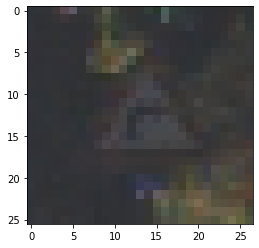

In [15]:
print(trainOriData.shape)
print(len(trainLabels))
plt.imshow(cv2.cvtColor(trainOriData[0], cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
testOriData, testLabels = load_data(data_dir, ori_test_path, 'Test.csv')

(12630,)
12630


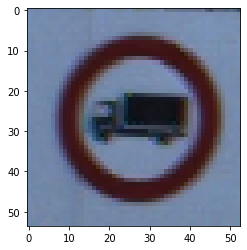

In [17]:
print(testOriData.shape)
print(len(testLabels))
plt.imshow(cv2.cvtColor(testOriData[0], cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
trainOriData = resize_img(trainOriData)
trainOriData.shape

(39209, 32, 32, 3)

In [19]:
trainOriData, trainLabels = randomize_data(trainLabels, trainOriData)

In [20]:
testOriData = resize_img(testOriData)
testOriData.shape

(12630, 32, 32, 3)

In [21]:
len(trainLabels)

39209

In [22]:
testLabels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [23]:
train_model_ori(estimators, trainOriData, trainLabels, testOriData, testLabels)

Linear SVM WITH C=1
[INFO] loading classifier: SVM trained on ori images...
[INFO] Classifer is loaded as instance ::rf::
EVALUATION ON TESTING DATA FOR1SVM
              precision    recall  f1-score   support

           0       0.56      0.25      0.34        60
           1       0.72      0.74      0.73       720
           2       0.58      0.88      0.70       750
           3       0.74      0.72      0.73       450
           4       0.70      0.78      0.74       660
           5       0.80      0.59      0.68       630
           6       0.82      0.62      0.70       150
           7       0.76      0.70      0.72       450
           8       0.78      0.83      0.80       450
           9       0.86      0.87      0.87       480
          10       0.92      0.96      0.94       660
          11       0.88      0.83      0.86       420
          12       0.98      0.93      0.95       690
          13       0.97      0.97      0.97       720
          14       0.99      0.8

0.9737815297508225
-------------------------------------------------------
Linear SVM WITH C=100
[INFO] loading classifier: SVM trained on ori images...
[INFO] Classifer is loaded as instance ::rf::
EVALUATION ON TESTING DATA FOR100SVM
              precision    recall  f1-score   support

           0       0.52      0.27      0.35        60
           1       0.68      0.75      0.71       720
           2       0.73      0.82      0.77       750
           3       0.77      0.70      0.74       450
           4       0.74      0.74      0.74       660
           5       0.66      0.78      0.72       630
           6       0.84      0.63      0.72       150
           7       0.67      0.72      0.70       450
           8       0.76      0.82      0.79       450
           9       0.85      0.88      0.86       480
          10       0.92      0.96      0.94       660
          11       0.87      0.83      0.85       420
          12       0.98      0.93      0.96       690
       